# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [162]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, balanced_accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, ConfusionMatrixDisplay

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
X = data.drop("MEDV", axis=1)
y = data['MEDV']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X = X_train, y = y_train)

LinearRegression()

In [18]:
y_train_predict = lr.predict(X_train)

In [20]:
lr.fit(X = X_test, y = y_test)

LinearRegression()

In [22]:
y_test_predict = lr.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [46]:
print("The R2 of the training set is: ", metrics.r2_score(y_train, y_train_predict).round(4))

The R2 of the training set is:  0.7205


In [47]:
print("The R2 of the test set is: ", metrics.r2_score(y_test, y_test_predict).round(4))

The R2 of the test set is:  0.8671


## 4. Calculate and print mean squared error for both the training and the testing set.

In [48]:
print("The mean squared error of the training set is: ", mean_squared_error(y_true = y_train, y_pred = y_train_predict).round(4))

The mean squared error of the training set is:  23.6483


In [49]:
print("The mean squared error of the test set is: ", mean_squared_error(y_true = y_test, y_pred = y_test_predict).round(4))

The mean squared error of the test set is:  11.1102


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [54]:
print("The mean absolute error of the test set is: ", mean_absolute_error(y_true = y_train, y_pred = y_train_predict).round(4))

The mean absolute error of the test set is:  3.3757


In [55]:
print("The mean absolute error of the test set is: ", mean_absolute_error(y_true = y_test, y_pred = y_test_predict).round(4))

The mean absolute error of the test set is:  2.5116


## Classification Model Evaluation

In [58]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [59]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
X = data.drop('class', axis = 1)
y = data['class']

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [73]:
log = LogisticRegression()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [81]:
log.fit(X = X_train, y = y_train)

LogisticRegression()

In [82]:
log.fit(X = X_test, y = y_test)

LogisticRegression()

In [84]:
y_pred_train = log.predict(X_train)

In [85]:
y_pred_test = log.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [92]:
acc_train_score = accuracy_score(y_true = y_train, y_pred = y_pred_train).round(4)

In [93]:
acc_test_score = accuracy_score(y_true = y_test, y_pred = y_pred_test)

In [94]:
print(f"The accuracy score of the trainning is {acc_train_score}")
print(f"The accuracy score of the test is {acc_test_score}")

The accuracy score of the trainning is 0.9583
The accuracy score of the test is 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [96]:
b_train_score = balanced_accuracy_score(y_train, y_pred_train)

In [97]:
b_test_score = balanced_accuracy_score(y_test, y_pred_test)

In [135]:
print(f"The balanced accuracy score of the trainning is {acc_train_score}")
print(f"The balanced accuracy score of the test is {acc_test_score}")

The balanced accuracy score of the trainning is 0.9583
The balanced accuracy score of the test is 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [124]:
# It says that we need to select one type of average, as the one by default is binary. 
# I checked the documentation and selected the macro:
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
# I will use this one in the following ones. 
prec_train = precision_score(y_train, y_pred_train, average = "macro").round(4)

In [125]:
prec_test = precision_score(y_test, y_pred_test, average = "macro")

In [126]:
print(f"The precision score of the trainning is {prec_train}")
print(f"The precision score of the test is {prec_test}")

The precision score of the trainning is 0.9579
The precision score of the test is 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [155]:
rec_train = recall_score(y_train, y_pred_train, average = "macro").round(4)

In [158]:
rec_test = recall_score(y_test, y_pred_test, average = "macro")

In [157]:
print(f"The recall score of the trainning is {rec_train}")
print(f"The recall score of the test is {rec_test}")

The recall score of the trainning is 0.9579
The recall score of the test is 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [137]:
f1_train = f1_score(y_train, y_pred_train, average = "macro").round(4)

In [138]:
f1_test = f1_score(y_test, y_pred_test, average = "macro")

In [139]:
print(f"The f1 score of the trainning is {f1_train}")
print(f"The f1 score of the test is {f1_test}")

The f1 score of the trainning is 0.9578
The f1 score of the test is 1.0


## 13. Generate confusion matrices for both the training and the testing set.

In [142]:
confusion_matrix(y_train, y_pred_train)

array([[41,  0,  0],
       [ 0, 37,  3],
       [ 0,  2, 37]])

In [159]:
pd.crosstab(y_train, y_pred_train)

col_0,0,1,2
class,,,
0,41,0,0
1,0,37,3
2,0,2,37


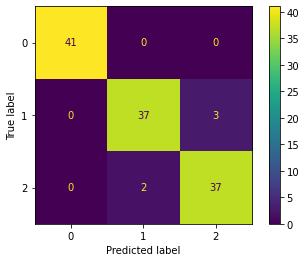

In [163]:
ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train)).plot()

In [144]:
confusion_matrix(y_test, y_pred_test)

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 11]])

In [166]:
pd.crosstab(y_test, y_pred_test)

col_0,0,1,2
class,,,
0,9,0,0
1,0,10,0
2,0,0,11


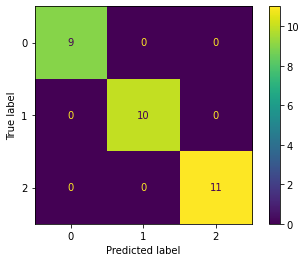

In [167]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test)).plot()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.